In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/advertising.csv"))

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


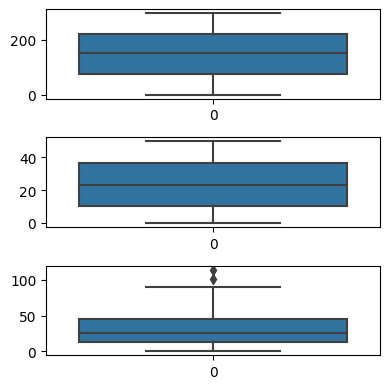

In [8]:
fig, axs = plt.subplots(3, figsize = (4,4))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Radio'], ax = axs[1])
plt3 = sns.boxplot(data['Newspaper'], ax = axs[2])
plt.tight_layout()

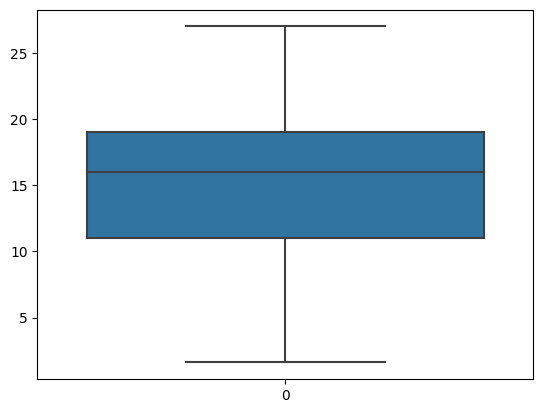

In [9]:
sns.boxplot(data['Sales'])
plt.show()

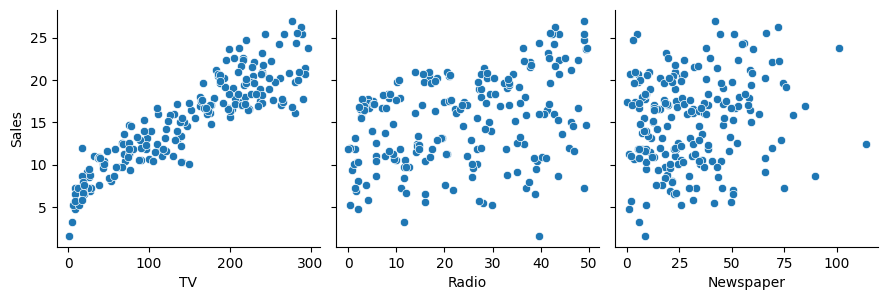

In [10]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()

In [11]:
x = data['TV']
y = data['Sales']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [13]:
x_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [14]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

In [16]:

x_train_sm = sm.add_constant(x_train)


lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    6.995533
TV       0.054105
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.03e-61
Time:                        06:46:10   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.000       6.318       7.673
TV             0.0541      0.002     26.976      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.029
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       3.014   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

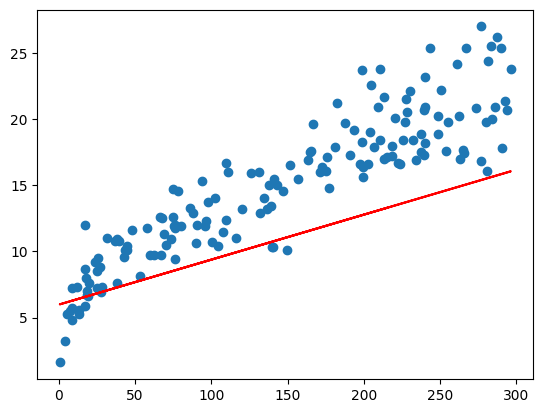

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 5.974 + 0.034*x_train, 'r')
plt.show()

In [20]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

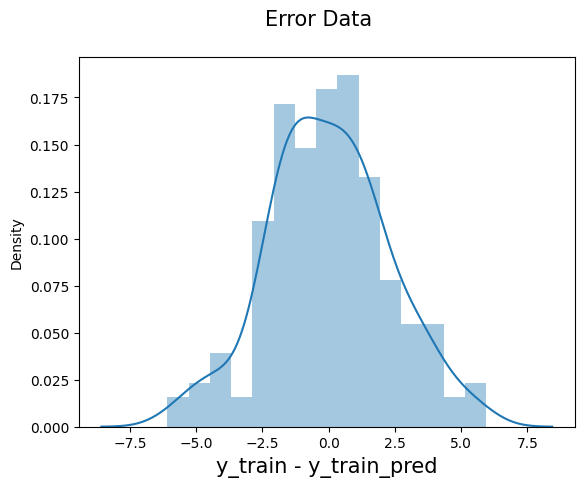

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Data', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()